#Forest Fire Area Prediction
[데이터 셋](https://www.kaggle.com/datasets/sumitm004/forest-fire-area)
- 모델 : SGD, XGboost 이용
- 전처리 : IQR기반 이상치 제거
  - 특이사항 : Area는 2차원 데이터이므로 차원 축소 -> Area 제곱근

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

filename = '/content/drive/MyDrive/forest_fires.csv'

In [ ]:
df = pd.read_csv(filename)
df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


# 강우 or 산불 여부 컬럼 추가(강우만 추가!!!)

In [ ]:
#area에 0이상의 값이 있으면 1(산불 남) 없으면 0(산불이 안남)

df["isFire"] = np.where(df["area"] > 0 , 1, 0)
df["isRain"] = np.where(df["rain"] > 0 , 1, 0)
df= df.drop(columns="rain")
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,area,isFire,isRain
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0,0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0,0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0,0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.0,0,1
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0,0


#!!!!!!!!!!!!area 제곱근 !!!!!!!!!!!!

In [ ]:
# 제곱근 적용
df['area'] = df['area'].apply(lambda x: x**0.5)  # 또는 df['column_name'].apply(np.sqrt)

# 또는
# df['column_name_sqrt'] = np.sqrt(df['column_name'])

# 결과 출력
print(df)

     X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind      area  \
0    7  5   mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7  0.000000   
1    7  4   oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9  0.000000   
2    7  4   oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3  0.000000   
3    8  6   mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0  0.000000   
4    8  6   mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8  0.000000   
..  .. ..   ...  ...   ...    ...    ...   ...   ...  ..   ...       ...   
512  4  3   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7  2.537716   
513  2  4   aug  sun  81.6   56.7  665.6   1.9  21.9  71   5.8  7.368175   
514  7  4   aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7  3.340659   
515  1  4   aug  sat  94.4  146.0  614.7  11.3  25.6  42   4.0  0.000000   
516  6  3   nov  tue  79.5    3.0  106.7   1.1  11.8  31   4.5  0.000000   

     isFire  isRain  
0         0       0  
1         0       0  
2         0       0  

In [ ]:
df['area'] = df['area'].apply(lambda x: x**0.5)

#원-핫 인코딩

In [ ]:
import pandas as pd

# 원-핫 인코딩을 수행하려는 열들의 이름
columns_to_encode = ['X', 'Y', 'month','day'] #원하는 열들 추가

# 데이터프레임 불러오기 또는 생성
# 예를 들어, df는 원본 데이터프레임이라고 가정
df_encoded = pd.get_dummies(df, columns=columns_to_encode, drop_first=True)
#if(df_encoded["area"]>600):
#  print(df_encoded)
df_encoded.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,month_oct,month_sep,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,1,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,1,0,0,1,0,0,0,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0


# 이상치 제거

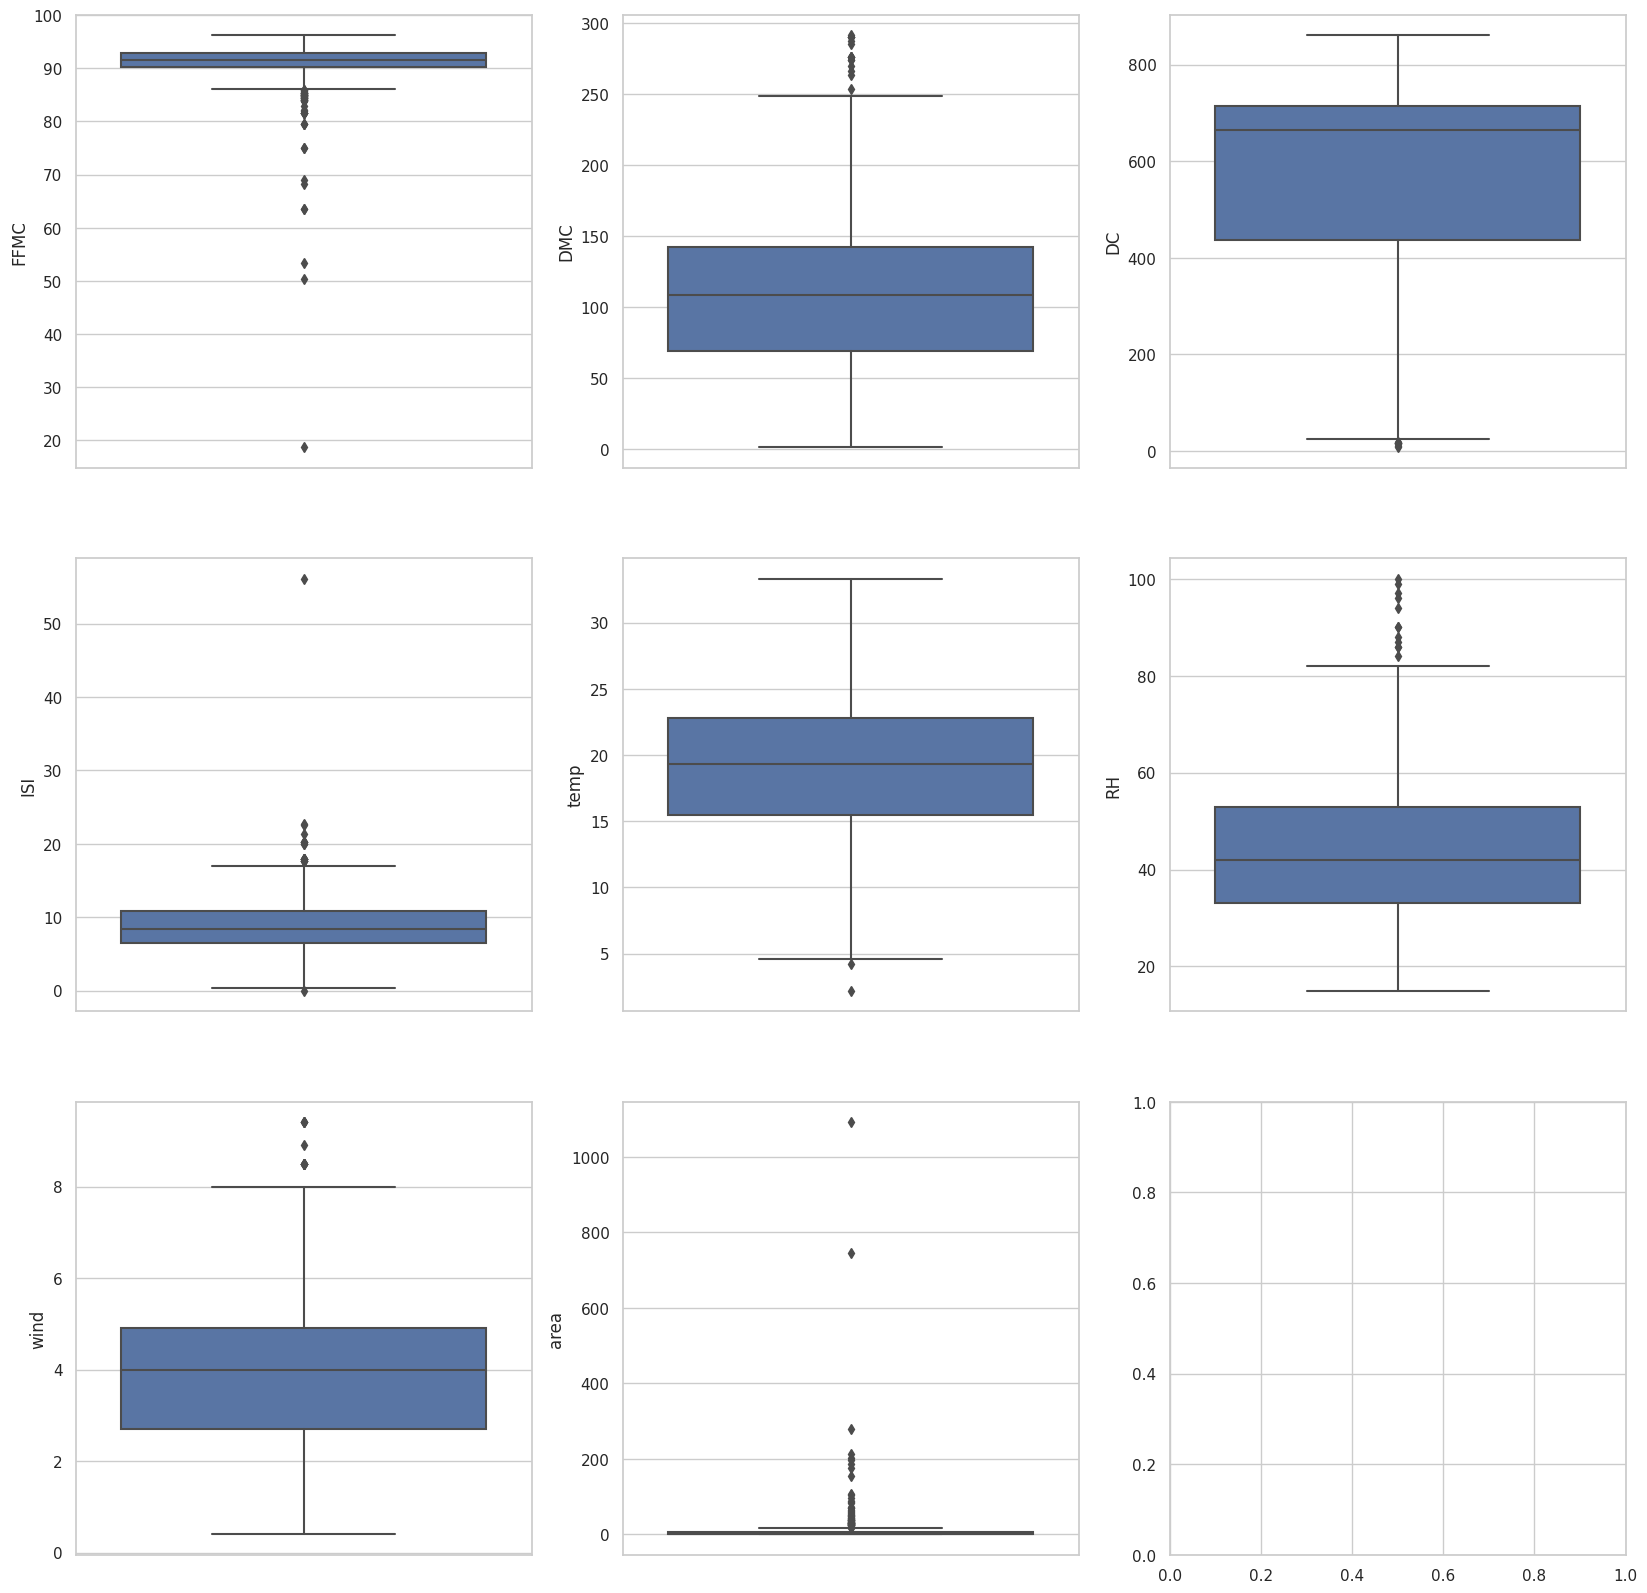

In [ ]:
import seaborn as sns

fList = ["FFMC"	,"DMC"	,"DC"	,"ISI" ,"temp"	,"RH"	,"wind"	,"area"]#,"rain"
fig, ax = plt.subplots(ncols=3, nrows=3, figsize=(20,20))

k=0
for feature in fList:
  i = k//3
  j = k%3
  #print(i,j)
  sns.boxplot(y=feature,  ax=ax[i,j], data=df_encoded)
  #sns.violinplot(y=feature,  ax=ax[i,j], data=df_encoded)
  k+=1
#sns.boxplot(y="area", data=feature, ax=ax[0,0])


##이상치제거함수


In [ ]:
def remove_out(df, remove_col):
  dff = df
  for k in remove_col:
    level_1q = dff[k].quantile(0.25)
    level_3q = dff[k].quantile(0.75)
    IQR = level_3q - level_1q
    rev_range=3 #제거 범위 조절 변수
    dff = dff[(dff[k] <= level_3q + (rev_range * IQR)) & (dff[k] >= level_1q - (rev_range * IQR))]
    dff = dff.reset_index(drop=True)
  return dff

df_remove_outlier = remove_out(df_encoded, ["area", "ISI", "FFMC", "wind"])


# 시각화


## 원핫 인코딩 값 (X, Y), month, day 에 대한 그래프

X,Y

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# 예제 데이터
x = df["X"]
y = df["Y"]
count = np.array([5, 10, 15, 20, 25])

# 3차원 막대그래프 생성
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 막대그래프 그리기
ax.bar(x, y, count, zdir='y', color='b', alpha=0.7)

# 축 레이블 설정
ax.set_xlabel('X 축')
ax.set_ylabel('Y 축')
ax.set_zlabel('Count 축')

# 그래프 제목 설정
ax.set_title('3d hist')

# 그래프 표시
plt.show()

ValueError: ignored

Error in callback <function _draw_all_if_interactive at 0x7c29c09de050> (for post_execute):


AttributeError: ignored

AttributeError: ignored

<Figure size 1000x800 with 1 Axes>

## 이상치 제거 안했을때(시각화)

---



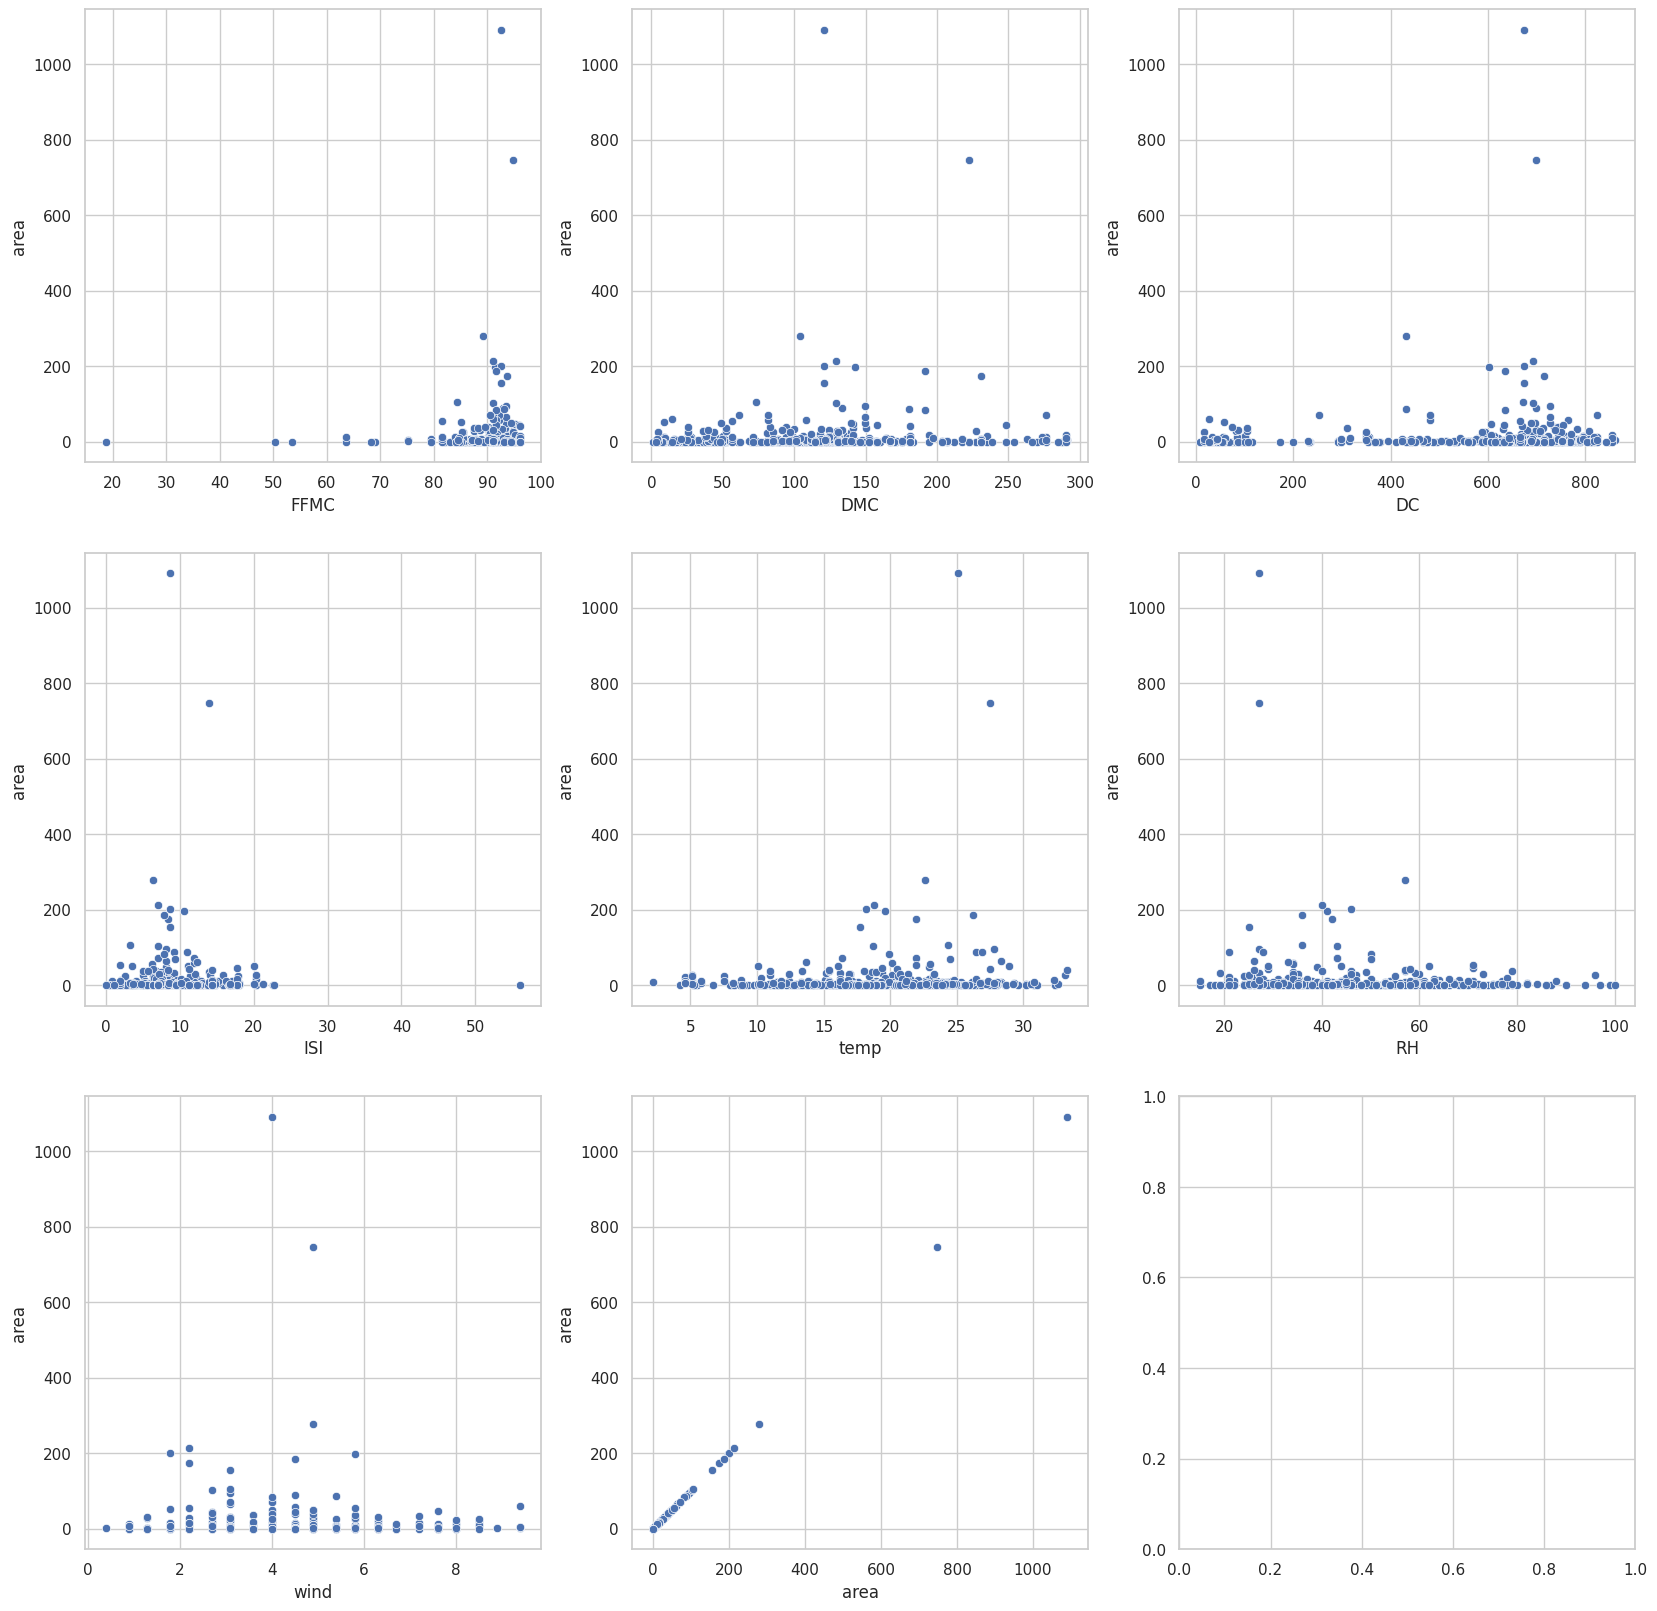

In [ ]:
import seaborn as sns

fList = ["FFMC"	,"DMC"	,"DC"	,"ISI"	,"temp"	,"RH"	,"wind"	, "area"]#,"rain"


fig, ax = plt.subplots(ncols=3, nrows=3, figsize=(20,20))

k=0
for feature in fList:
  i = k//3
  j = k%3

  #print(i,j)
  sns.scatterplot(data=df_encoded, x=feature, y="area", ax=ax[i, j])
  k+=1


##이상치 제거 (시각화)

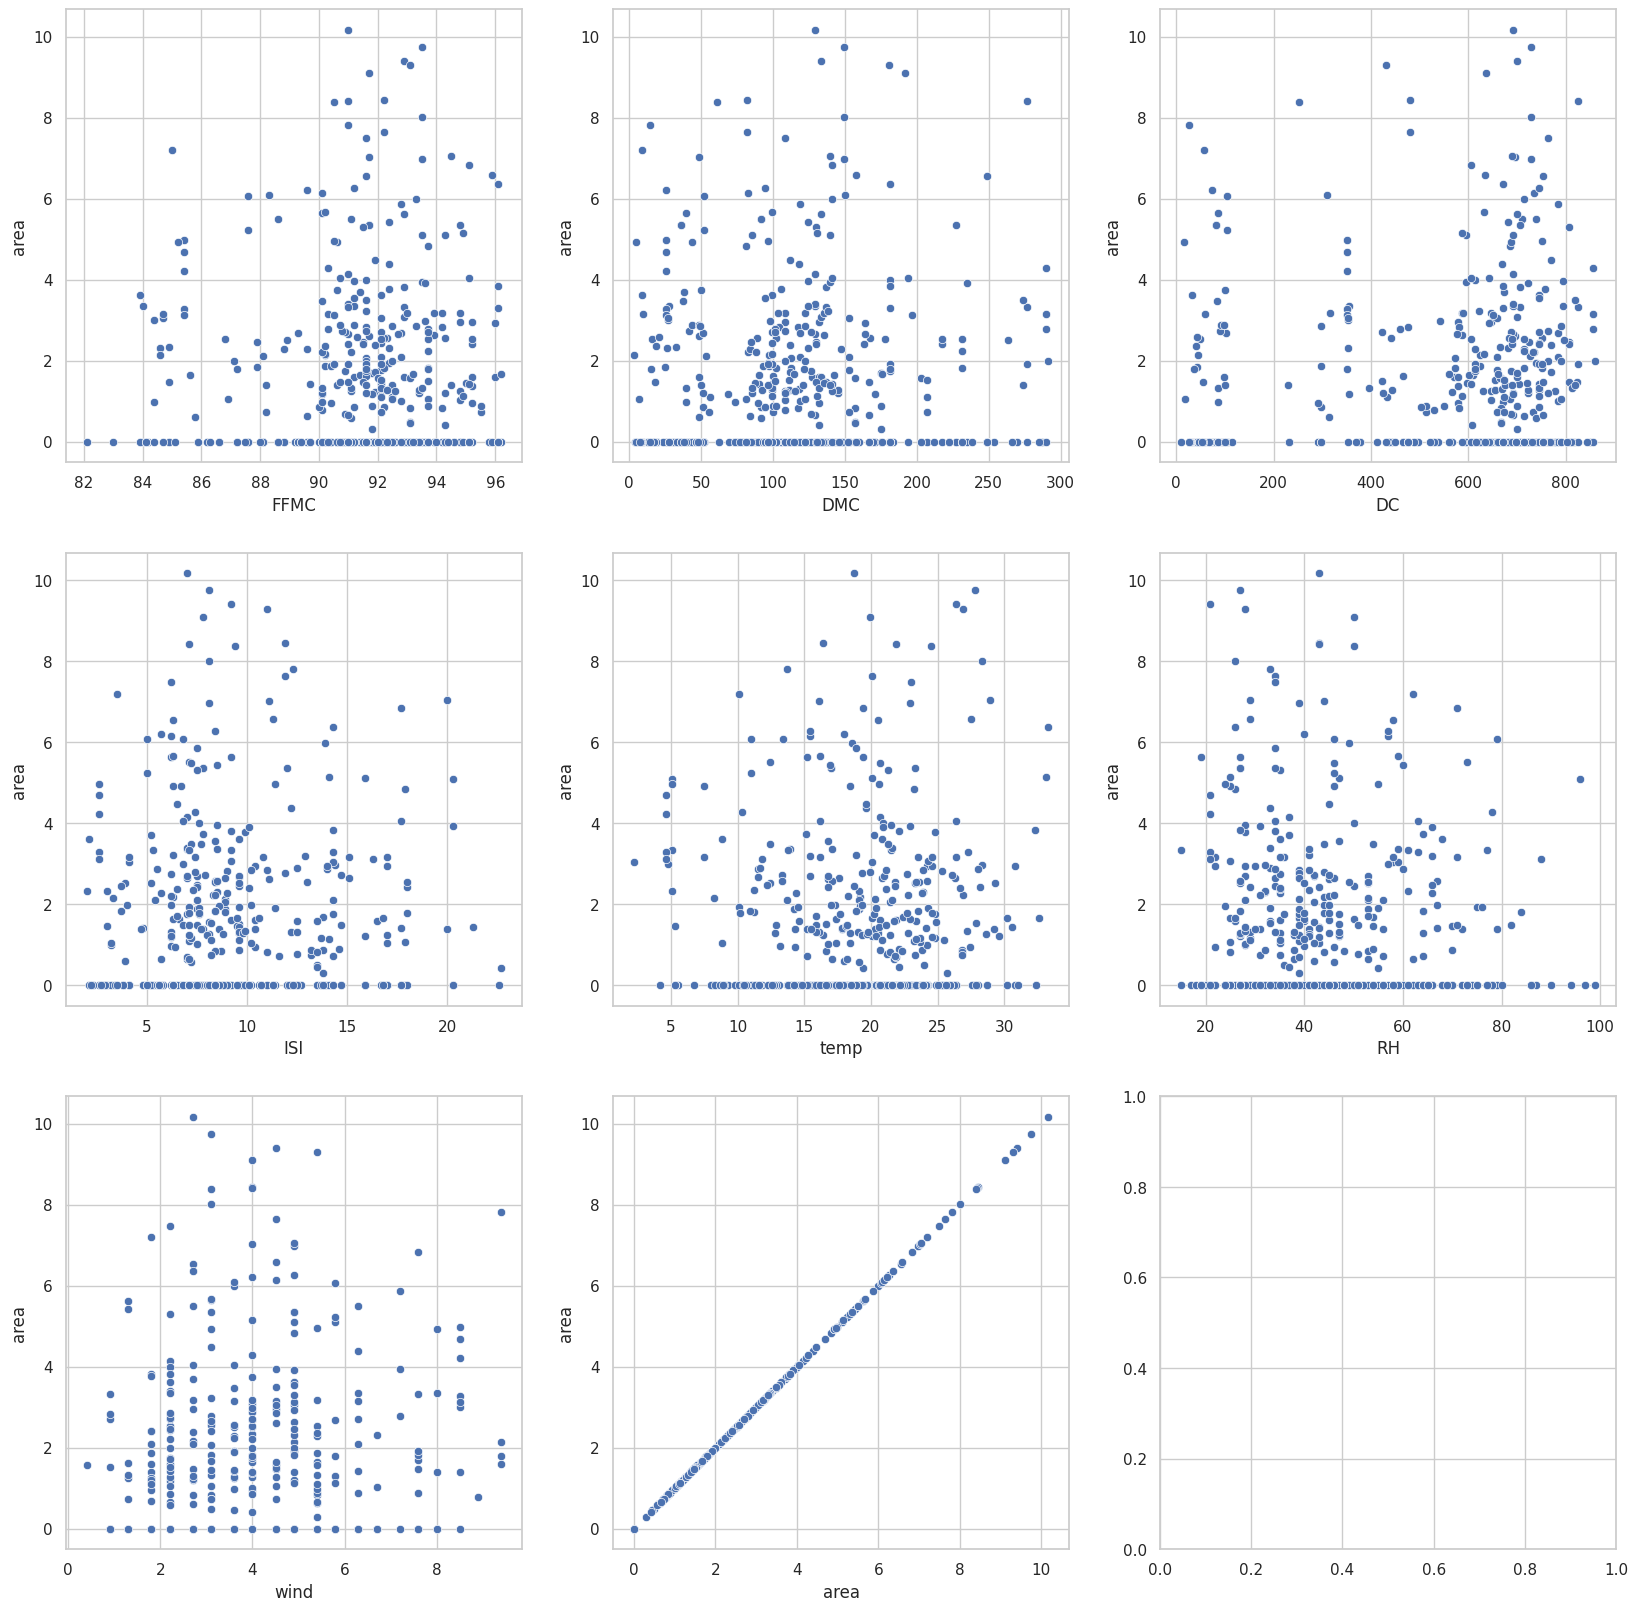

In [ ]:
import seaborn as sns

fList = ["FFMC"	,"DMC"	,"DC"	,"ISI"	,"temp"	,"RH"	,"wind"	, "area"] #"rain"


fig, ax = plt.subplots(ncols=3, nrows=3, figsize=(20,20))

k=0
for feature in fList:
  i = k//3
  j = k%3
  #print(i,j)
  sns.scatterplot(data=df_remove_outlier, x=feature, y="area", ax=ax[i, j])
  k+=1

# 선형회귀 (이상치 제거 안된것)



In [ ]:
df_encoded.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,area,isFire,isRain,...,month_may,month_nov,month_oct,month_sep,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split

x = df_encoded.drop(columns="area")
y = df_encoded["area"]
print(x)
print(y)

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=43)
print(xtrain.shape)
print(xtest.shape)

     FFMC    DMC     DC   ISI  temp  RH  wind  isRain  X_2  X_3  ...  \
0    86.2   26.2   94.3   5.1   8.2  51   6.7       0    0    0  ...   
1    90.6   35.4  669.1   6.7  18.0  33   0.9       0    0    0  ...   
2    90.6   43.7  686.9   6.7  14.6  33   1.3       0    0    0  ...   
3    91.7   33.3   77.5   9.0   8.3  97   4.0       1    0    0  ...   
4    89.3   51.3  102.2   9.6  11.4  99   1.8       0    0    0  ...   
..    ...    ...    ...   ...   ...  ..   ...     ...  ...  ...  ...   
512  81.6   56.7  665.6   1.9  27.8  32   2.7       0    0    0  ...   
513  81.6   56.7  665.6   1.9  21.9  71   5.8       0    1    0  ...   
514  81.6   56.7  665.6   1.9  21.2  70   6.7       0    0    0  ...   
515  94.4  146.0  614.7  11.3  25.6  42   4.0       0    0    0  ...   
516  79.5    3.0  106.7   1.1  11.8  31   4.5       0    0    0  ...   

     month_may  month_nov  month_oct  month_sep  day_mon  day_sat  day_sun  \
0            0          0          0          0        0 

###피쳐스케일링

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

xtrain = pd.DataFrame(scaler.fit_transform(xtrain),columns=xtrain.columns)
xtest = pd.DataFrame(scaler.transform(xtest),columns=xtest.columns)

In [ ]:
xtrain.head(), xtest.head(), ytrain.head(),ytest.head()

(       FFMC       DMC        DC       ISI      temp        RH      wind  \
 0  0.926452  0.329428  0.870668  0.203209  0.585209  0.470588  0.500000   
 1  0.950968  0.360786  0.879596  0.176471  0.726688  0.152941  0.155556   
 2  0.934194  0.300138  0.848585  0.147950  0.662379  0.364706  0.400000   
 3  0.975484  0.450034  0.702220  0.404635  0.553055  0.470588  0.400000   
 4  0.932903  0.571330  0.873135  0.126560  0.607717  0.658824  0.800000   
 
    isRain  X_2  X_3  ...  month_may  month_nov  month_oct  month_sep  day_mon  \
 0     0.0  0.0  0.0  ...        0.0        0.0        0.0        1.0      0.0   
 1     0.0  0.0  0.0  ...        0.0        0.0        0.0        1.0      0.0   
 2     0.0  0.0  1.0  ...        0.0        0.0        0.0        1.0      0.0   
 3     0.0  0.0  0.0  ...        0.0        0.0        0.0        0.0      0.0   
 4     1.0  0.0  0.0  ...        0.0        0.0        0.0        0.0      0.0   
 
    day_sat  day_sun  day_thu  day_tue  day_wed 

###회귀 함수 적용ㅇ

In [ ]:
from sklearn import linear_model

regr = linear_model.LinearRegression(fit_intercept=True, copy_X=True, n_jobs=8) #최소자승법
lasso_regr = linear_model.Lasso(alpha=0.01, fit_intercept=True, copy_X=True) #최소자승법
ridge_regr = linear_model.Ridge(alpha=0.01, fit_intercept=True, copy_X=True) #최소자승법
SGD_regr = linear_model.SGDRegressor(penalty="l2", alpha=0.01, max_iter=1000, tol=0.001, eta0=0.01) #경사하강법


SGD_Regr을 사용했을때(경사하강법)

In [ ]:
SGD_regr.fit(xtrain, ytrain)

SGDRegressor(alpha=0.01)

W 값

In [ ]:
print('Coefficients: ', SGD_regr.coef_)
print('intercept: ', SGD_regr.intercept_)

Coefficients:  [ 0.25449332  0.55963955  0.09046184 -0.13436756  0.52277661 -0.2626063
  0.81255449 -0.41232717  0.22563299 -0.72022664  0.14346213 -0.5392805
  0.20493171  0.21205749  0.79793542  0.36476677  0.15901175  0.26127267
 -0.38248974  0.20906596  0.69795211 -0.35387208 -0.15499436  0.80527109
  0.1131664  -0.09343128  0.39271018 -0.44853093 -0.26612721  0.22271518
 -0.0974979  -0.18165968  0.25751323  0.00163421  0.29971517 -0.05518785
  0.06219944  0.2811738   0.35931994]
intercept:  [0.3700955]


In [ ]:
SGD_regr.predict(xtest[:5])


array([1.69966066, 1.49759281, 2.55709663, 1.60933131, 0.74076672])

### test 데이터세트를 사용하여 성능평가를 수행

In [ ]:
xtest[:5].dot(SGD_regr.coef_.T) + SGD_regr.intercept_

0    1.699661
1    1.497593
2    2.557097
3    1.609331
4    0.740767
dtype: float64

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

y_true = ytest.copy()
y_hat = SGD_regr.predict(xtest)

r2_score(y_true, y_hat), mean_absolute_error(y_true, y_hat), mean_squared_error(y_true, y_hat)

(-0.035456858310142225, 2.1698888343229785, 16.65408762428331)

Text(0.5, 1.0, 'Area vs Predicted Area : $Y_i$ vs $\\hat{Y}_i$')

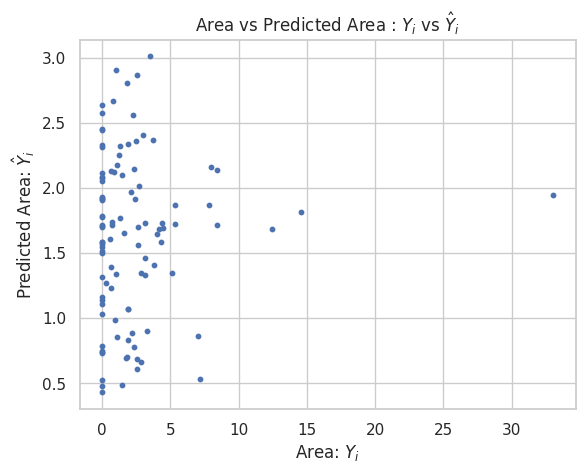

In [ ]:
plt.scatter(y_true, y_hat, s=10)
plt.xlabel("Area: $Y_i$")
plt.ylabel("Predicted Area: $\hat{Y}_i$")
plt.title("Area vs Predicted Area : $Y_i$ vs $\hat{Y}_i$")

# 선형회귀 (이상치 제거)



In [ ]:
from sklearn.model_selection import train_test_split

x = df_remove_outlier.drop(columns="area")
y = df_remove_outlier["area"]
print(x)
print(y)

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=43)
print(xtrain.shape)
print(xtest.shape)

     FFMC    DMC     DC   ISI  temp  RH  wind  isFire  isRain  X_2  ...  \
0    86.2   26.2   94.3   5.1   8.2  51   6.7       0       0    0  ...   
1    90.6   35.4  669.1   6.7  18.0  33   0.9       0       0    0  ...   
2    90.6   43.7  686.9   6.7  14.6  33   1.3       0       0    0  ...   
3    91.7   33.3   77.5   9.0   8.3  97   4.0       0       1    0  ...   
4    89.3   51.3  102.2   9.6  11.4  99   1.8       0       0    0  ...   
..    ...    ...    ...   ...   ...  ..   ...     ...     ...  ...  ...   
482  91.0  166.9  752.6   7.1  25.9  41   3.6       0       0    1  ...   
483  91.0  166.9  752.6   7.1  25.9  41   3.6       0       0    0  ...   
484  91.0  166.9  752.6   7.1  21.1  71   7.6       1       1    0  ...   
485  91.0  166.9  752.6   7.1  18.2  62   5.4       1       0    0  ...   
486  94.4  146.0  614.7  11.3  25.6  42   4.0       0       0    0  ...   

     month_may  month_nov  month_oct  month_sep  day_mon  day_sat  day_sun  \
0            0       

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

xtrain = pd.DataFrame(scaler.fit_transform(xtrain),columns=xtrain.columns)
xtest = pd.DataFrame(scaler.transform(xtest),columns=xtest.columns)

In [ ]:
xtrain.head(), xtest.head(), ytrain.head(),ytest.head()

(       FFMC       DMC        DC       ISI      temp        RH      wind  \
 0  0.685714  0.111613  0.083989  0.280193  0.302251  0.178571  0.655556   
 1  0.914286  0.440195  0.678727  0.584541  0.681672  0.297619  0.600000   
 2  0.785714  0.534075  0.772231  0.555556  0.639871  0.261905  0.355556   
 3  0.300000  0.082406  0.103136  0.149758  0.228296  0.345238  0.455556   
 4  0.871429  0.283032  0.802302  0.671498  0.565916  0.416667  0.555556   
 
    isFire  isRain  X_2  ...  month_may  month_nov  month_oct  month_sep  \
 0     0.0     0.0  0.0  ...        0.0        0.0        0.0        0.0   
 1     1.0     0.0  0.0  ...        0.0        0.0        0.0        0.0   
 2     1.0     0.0  0.0  ...        0.0        0.0        0.0        0.0   
 3     0.0     0.0  0.0  ...        0.0        0.0        0.0        0.0   
 4     0.0     0.0  0.0  ...        0.0        0.0        0.0        1.0   
 
    day_mon  day_sat  day_sun  day_thu  day_tue  day_wed  
 0      0.0      1.0     

###회귀 함수 적용ㅇ

In [ ]:
from sklearn import linear_model


regr = linear_model.LinearRegression(fit_intercept=True, copy_X=True, n_jobs=8) #최소자승법
lasso_regr = linear_model.Lasso(alpha=0.01, fit_intercept=True, copy_X=True) #최소자승법
ridge_regr = linear_model.Ridge(alpha=0.01, fit_intercept=True, copy_X=True) #최소자승법
SGD_regr = linear_model.SGDRegressor(penalty="l2", alpha=0.01, max_iter=1000, tol=0.001, eta0=0.01) #경사하강법


SGD_Regr을 사용했을때(경사하강법)

In [ ]:
SGD_regr.fit(xtrain, ytrain)

SGDRegressor(alpha=0.01)

W 값

In [ ]:
print('Coefficients: ', SGD_regr.coef_)
print('intercept: ', SGD_regr.intercept_)

Coefficients:  [ 0.05266994  0.3270126  -0.18812258  0.0569733   0.04783123 -0.0742593
  0.24161417  2.79199651 -0.10409789 -0.1732331  -0.18971151  0.40939743
 -0.08843461  0.12173208  0.14920504 -0.32888503  0.15619083  0.21861743
  0.01940675 -0.15562308  0.2600333   0.         -0.22319119 -0.30978932
  0.11477941  0.14926644 -0.00418991 -0.17636366 -0.0914146  -0.08767085
  0.12562397  0.          0.16418742 -0.05445728 -0.01432948  0.02532753
  0.21676832 -0.10170372  0.26344644 -0.06496042]
intercept:  [-0.03006998]


In [ ]:
SGD_regr.predict(xtest[:5])


array([3.3912347 , 3.47053801, 2.67894671, 3.5938487 , 0.23070547])

### test 데이터세트를 사용하여 성능평가를 수행

In [ ]:
xtest[:5].dot(SGD_regr.coef_.T) + SGD_regr.intercept_

0    3.391235
1    3.470538
2    2.678947
3    3.593849
4    0.230705
dtype: float64

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

y_true = ytest.copy()
y_hat = SGD_regr.predict(xtest)

r2_score(y_true, y_hat), mean_absolute_error(y_true, y_hat), mean_squared_error(y_true, y_hat)

(0.450524780707692, 1.0137319977254102, 2.4429322446802666)

Text(0.5, 1.0, 'Area vs Predicted Area : $Y_i$ vs $\\hat{Y}_i$')

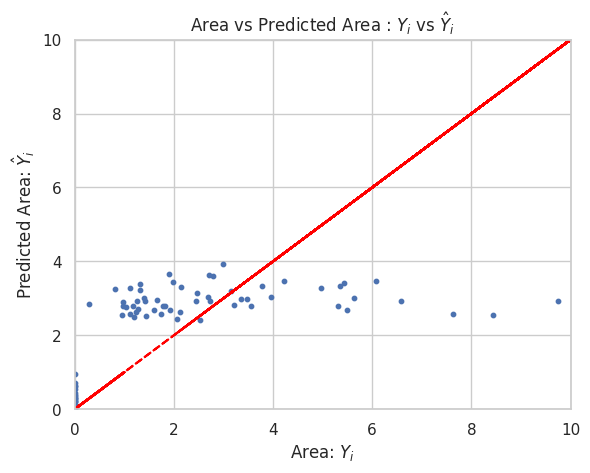

In [ ]:
plt.scatter(y_true, y_hat, s=10, label='데이터')
plt.plot(x, x, color='red', linestyle='--', label='x=y 그래프')

plt.xlabel("Area: $Y_i$")
plt.ylabel("Predicted Area: $\hat{Y}_i$")
plt.xlim([0, 10])      # X축의 범위: [xmin, xmax]
plt.ylim([0, 10])     # Y축의 범위: [ymin, ymax]

plt.title("Area vs Predicted Area : $Y_i$ vs $\hat{Y}_i$")

#갑자기 라쏘

In [ ]:
lasso_regr.fit(xtrain, ytrain)

Lasso(alpha=0.01)

In [ ]:
print('Coefficients: ', lasso_regr.coef_)
print('intercept: ', lasso_regr.intercept_)

Coefficients:  [ 0.          0.74788042 -0.35806883  0.          0.         -0.
  0.17616998  2.9358136  -0.         -0.12015849 -0.03382101  0.43091695
 -0.          0.07480366  0.11191508 -0.48393638  0.          0.24503682
 -0.         -0.12057831  0.36838146  0.         -0.16507538 -0.29809895
  0.          0.03232455  0.         -0.14777068 -0.         -0.
  0.          0.          0.2974696  -0.          0.          0.03269874
  0.20073583 -0.00951926  0.25588614 -0.        ]
intercept:  -0.1610529532223719


In [ ]:
lasso_regr.predict(xtest[:5])


array([3.43560244, 3.27748261, 2.84882918, 3.89222572, 0.09257378])

In [ ]:
xtest[:5].dot(lasso_regr.coef_.T) + lasso_regr.intercept_

0    3.435602
1    3.277483
2    2.848829
3    3.892226
4    0.092574
dtype: float64

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

y_true = ytest.copy()
y_hat = lasso_regr.predict(xtest)

r2_score(y_true, y_hat), mean_absolute_error(y_true, y_hat), mean_squared_error(y_true, y_hat)

(0.44118283540074554, 1.0256039980241498, 2.484465945595427)

Text(0.5, 1.0, 'Area vs Predicted Area : $Y_i$ vs $\\hat{Y}_i$')

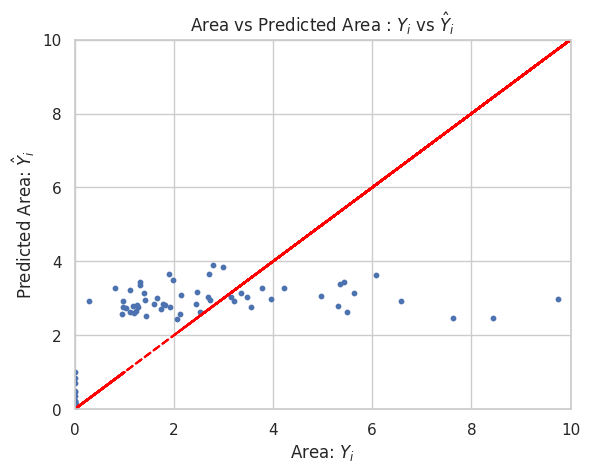

In [ ]:
plt.scatter(y_true, y_hat, s=10, label='데이터')
plt.plot(x, x, color='red', linestyle='--', label='x=y 그래프')

plt.xlim([0, 10])      # X축의 범위: [xmin, xmax]
plt.ylim([0, 10])     # Y축의 범위: [ymin, ymax]
plt.xlabel("Area: $Y_i$")
plt.ylabel("Predicted Area: $\hat{Y}_i$")
plt.title("Area vs Predicted Area : $Y_i$ vs $\hat{Y}_i$")

#XGBoost(Area 제곱근 안한것)

In [ ]:
import xgboost
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score


X_train, X_test, y_train, y_test = train_test_split(x, y ,test_size=0.1)
xgb_model = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)

print(len(X_train), len(X_test))
xgb_model.fit(X_train,y_train)

438 49


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.08, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, random_state=None, ...)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

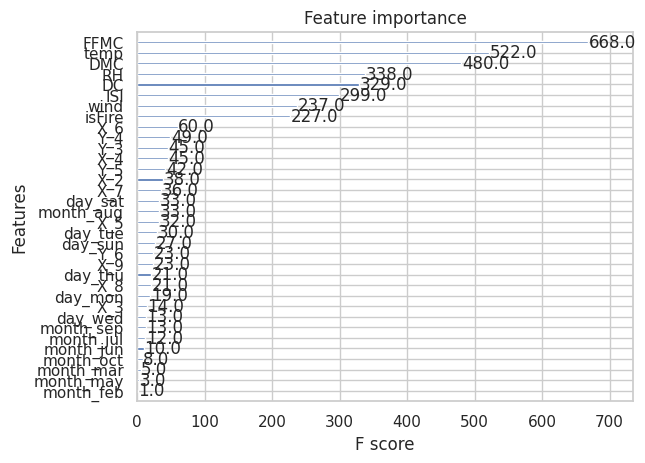

In [ ]:
xgboost.plot_importance(xgb_model)

In [ ]:
predictions = xgb_model.predict(X_test)
predictions

array([ 3.3642542e-01, -3.1428707e-01, -1.1945294e-02,  3.0376878e+00,
        4.7266390e-02,  4.1618500e+00,  9.5699802e-02,  3.3465488e+00,
        1.5473833e+00,  3.4838364e-01, -2.2495059e-02,  1.0585506e-02,
        4.2273130e+00,  2.3639631e+00,  3.3691962e+00,  3.7214956e+00,
        9.6607402e-02,  2.9122243e-02,  2.0676465e+00,  9.0537503e-02,
        3.8812146e+00,  3.4119256e+00,  8.9438409e-02, -1.0385605e-02,
       -4.4361581e-03,  3.1405249e+00,  3.7648635e+00,  4.8857236e+00,
       -3.0407626e-03,  3.7687118e+00,  2.0991193e-01,  4.0351291e+00,
        2.5366814e+00,  3.1604466e+00,  2.0016234e-02,  5.9416986e+00,
        9.4254918e-02,  2.7464404e+00,  2.5804851e+00,  1.8180129e-01,
        8.0954857e-02,  2.2879100e+00,  8.5668512e-02,  2.5148749e+00,
       -7.4343674e-02,  2.3714226e-02,  4.7445226e+00,  1.2506642e+00,
        2.3024473e-01], dtype=float32)

In [ ]:
r_sq = xgb_model.score(X_train, y_train)
print(r_sq)
print(explained_variance_score(predictions,y_test))

0.9585657850072057
-2.8220166920616188


In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

y_true = y_test.copy()
y_hat = xgb_model.predict(X_test)

r2_score(y_true, y_hat), mean_absolute_error(y_true, y_hat), mean_squared_error(y_true, y_hat)

(-0.3460442895649376, 2.8204524954557417, 14.769515835394264)

Text(0.5, 1.0, 'Area vs Predicted Area : $Y_i$ vs $\\hat{Y}_i$')

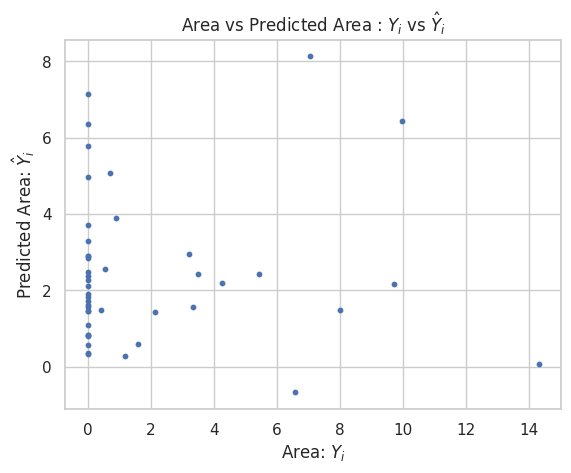

In [ ]:
plt.scatter(y_true, y_hat, s=10, label='데이터')
#plt.plot(x, x, color='red', linestyle='--', label='x=y 그래프')

plt.xlabel("Area: $Y_i$")
plt.ylabel("Predicted Area: $\hat{Y}_i$")
plt.title("Area vs Predicted Area : $Y_i$ vs $\hat{Y}_i$")

In [ ]:
from sklearn.model_selection import GridSearchCV


param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [50, 100, 200, 500],
    'max_depth': [3, 5, 7, 9]
}

# GridSearchCV 정의
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# GridSearchCV를 사용하여 모델 학습
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print("Best Parameters: ", grid_search.best_params_)

# 최적의 모델 얻기
best_model = grid_search.best_estimator_

# 테스트 데이터 예측
y_pred = best_model.predict(X_test)

# 평가: 평균 제곱 오차 계산
mse = mean_squared_error(y_test, y_pred)
print(f'평균 제곱 오차 (MSE): {mse}')

Best Parameters:  {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
평균 제곱 오차 (MSE): 11.432208571457373


#XGBoost(Area 제곱근 한것)

In [ ]:
import xgboost
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score


X_train, X_test, y_train, y_test = train_test_split(x, y ,test_size=0.1)
xgb_model = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)

print(len(X_train), len(X_test))
xgb_model.fit(X_train,y_train)

438 49


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.08, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, random_state=None, ...)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

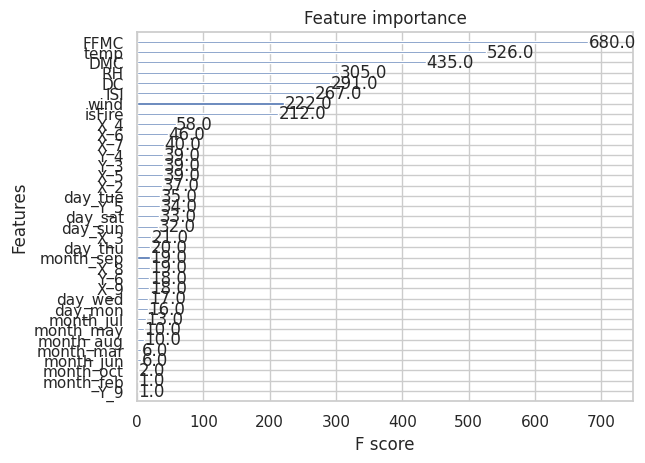

In [ ]:
xgboost.plot_importance(xgb_model)

In [ ]:
predictions = xgb_model.predict(X_test)
predictions

array([-5.1585797e-02,  2.0959422e-01,  1.3042271e-01,  2.2427431e-01,
        4.7507782e-02,  3.6573954e+00,  3.2578948e+00,  3.6653962e+00,
        3.7837620e+00,  7.8416549e-02,  3.3156621e+00,  1.1822553e-02,
       -9.3082584e-02,  2.6923871e-02,  1.6260060e+00,  7.5599812e-02,
        5.9865918e-02,  2.7435017e+00,  3.3433731e+00,  3.7347770e+00,
        8.9243315e-02,  3.2200966e+00,  2.9937544e+00, -6.5825111e-04,
        2.5596619e+00,  3.6782901e+00,  2.0499542e-02,  6.2502548e-02,
        2.6411474e+00, -4.8012594e-03,  1.8351810e-01,  2.1600330e+00,
        5.2331777e+00,  2.7744999e+00,  1.5861465e-01,  1.6522907e-01,
        3.5372237e-03,  3.2764904e+00,  2.8413365e+00,  1.8845255e+00,
       -8.4715169e-03, -2.6237965e-02, -2.6416784e-02,  3.2620015e+00,
        2.3517024e-02,  2.4509044e+00,  3.7903571e+00,  1.9238787e+00,
        2.8118825e+00], dtype=float32)

In [ ]:
r_sq = xgb_model.score(X_train, y_train)
print(r_sq)
print(explained_variance_score(predictions,y_test))

0.9849499675287621
0.5734284970595277


In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

y_true = y_test.copy()
y_hat = xgb_model.predict(X_test)

r2_score(y_true, y_hat), mean_absolute_error(y_true, y_hat), mean_squared_error(y_true, y_hat)

(-0.05230276774292819, 0.7358913790643192, 1.4565552822070327)

Text(0.5, 1.0, 'Area vs Predicted Area : $Y_i$ vs $\\hat{Y}_i$')

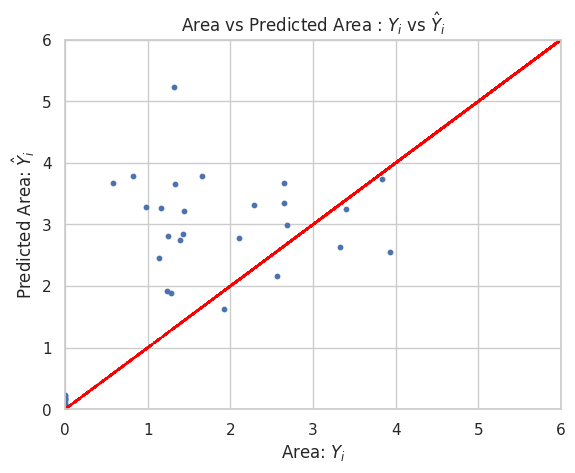

In [ ]:
plt.scatter(y_true, y_hat, s=10, label='데이터')

plt.plot(x, x, color='red', linestyle='--', label='x=y 그래프')

plt.xlim([0, 6])      # X축의 범위: [xmin, xmax]
plt.ylim([0, 6])     # Y축의 범위: [ymin, ymax]

plt.xlabel("Area: $Y_i$")
plt.ylabel("Predicted Area: $\hat{Y}_i$")
plt.title("Area vs Predicted Area : $Y_i$ vs $\hat{Y}_i$")

In [ ]:
from sklearn.model_selection import GridSearchCV


param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [200, 250, 300, 350, 400],
    'max_depth': [3, 5, 7, 9]
}

# GridSearchCV 정의
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# GridSearchCV를 사용하여 모델 학습
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print("Best Parameters: ", grid_search.best_params_)




best_model = grid_search.best_estimator_

# 테스트 데이터 예측
y_pred = best_model.predict(X_test)

# 평가: 평균 제곱 오차 계산
mse = mean_squared_error(y_test, y_pred)
r2_score(y_true, y_hat), mean_absolute_error(y_true, y_hat), mean_squared_error(y_true, y_hat)
#print(f'평균 제곱 오차 (MSE): {mse}')

Best Parameters:  {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 250}


(-0.05230276774292819, 0.7358913790643192, 1.4565552822070327)

#########################
#### 최적의 모델 얻기####
#########################

In [ ]:
best_model = grid_search.best_estimator_

# 테스트 데이터 예측
y_pred = best_model.predict(X_test)

# 평가: 평균 제곱 오차 계산
mse = mean_squared_error(y_test, y_pred)
r2_score(y_true, y_hat), mean_absolute_error(y_true, y_hat), mean_squared_error(y_true, y_hat)
#print(f'평균 제곱 오차 (MSE): {mse}')

(-0.05230276774292819, 0.7358913790643192, 1.4565552822070327)

In [ ]:
from sklearn.metrics import accuracy_score
scores = pd.DataFrame(grid_search.cv_results_)
pd.set_option('display.max_seq_items',None)
pd.set_option('display.max_columns', 16)
scores.info()

print(scores.sort_values(by=scores.columns[15], ascending=True).head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   mean_fit_time        60 non-null     float64
 1   std_fit_time         60 non-null     float64
 2   mean_score_time      60 non-null     float64
 3   std_score_time       60 non-null     float64
 4   param_learning_rate  60 non-null     object 
 5   param_max_depth      60 non-null     object 
 6   param_n_estimators   60 non-null     object 
 7   params               60 non-null     object 
 8   split0_test_score    60 non-null     float64
 9   split1_test_score    60 non-null     float64
 10  split2_test_score    60 non-null     float64
 11  split3_test_score    60 non-null     float64
 12  split4_test_score    60 non-null     float64
 13  mean_test_score      60 non-null     float64
 14  std_test_score       60 non-null     float64
 15  rank_test_score      60 non-null     int32

### 최적 파라미터로 그래프

Text(0.5, 1.0, 'Area vs Predicted Area : $Y_i$ vs $\\hat{Y}_i$')

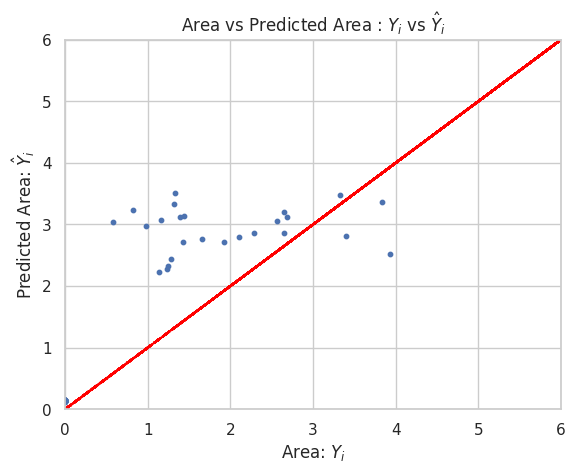

In [ ]:
plt.scatter(y_true, y_pred, s=10, label='데이터')

plt.plot(x, x, color='red', linestyle='--', label='x=y 그래프')

plt.xlim([0, 6])      # X축의 범위: [xmin, xmax]
plt.ylim([0, 6])     # Y축의 범위: [ymin, ymax]

plt.xlabel("Area: $Y_i$")
plt.ylabel("Predicted Area: $\hat{Y}_i$")
plt.title("Area vs Predicted Area : $Y_i$ vs $\hat{Y}_i$")